In [66]:
from sympy import *
init_printing()

# Formulation-II

We can represent this matrix symbolically in SymPy and explore its eigensystem.

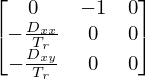

In [67]:
from sympy.abc import rho, beta, nu

a, nu_xx,nu_xy,nu_yx,nu_yy, b= symbols('a D_{xx} D_{xy} D_{yx} D_{yy} b')

n_x, n_y, Tr = symbols('n_x n_y T_r')

# Jacobian in x
H = Matrix([[0,-1,0], [-nu_xx/Tr,0, 0], [-nu_xy/Tr, 0, 0]])
# Jacobian in y
# H = Matrix([[0,0,-1], [-nu_xy/Tr,0, 0], [-nu_yy/Tr, 0, 0]])
H

The eigenvalues are the speeds at which information propagates with.  SymPy returns them as a
dictionary, giving the multiplicity for each eigenvalue.

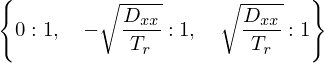

In [68]:
lamb = H.eigenvals()
simplify(lamb)

# J = lamb * numpy.identity(3)

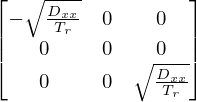

In [69]:
# mod=Matrix([[-sqrt(nu_xx), 0, 0], [0, 0, 0], [0, 0, sqrt(nu_xx)]])
# mod=Matrix([[-sqrt(nu_yy), 0, 0], [0, 0, 0], [0, 0, sqrt(nu_yy)]])
# mod
ND = Matrix([[-sqrt(nu_xx/Tr), 0, 0], [0, 0, 0], [0, 0, sqrt(nu_xx/Tr)]])
# ND = Matrix([[- sqrt(nu_yy/Tr), 0, 0], [0, 0, 0], [0, 0, sqrt(nu_yy/Tr)]])

simplify(ND)

In [70]:
# B.eigenvals()

The right eigenvectors are what SymPy gives natively.  For a given eigenvalue, $\lambda$, these 
satisfy:
    
$$A r = \lambda r$$

## Right Eigenvectors

In [71]:
R = H.eigenvects()   # this returns a tuple for each eigenvector with multiplicity -- unpack it
r = []
lam = []
for (ev, _, rtmp) in R:
    r.append(rtmp[0])
    lam.append(ev)
    
# # we can normalize them anyway we want, so let's make the first entry 1
# for n in range(len(r)):
#     v = r[n]
#     r[n] = v/v[0]

### 0-th right eigenvector 

In [72]:
simplify(r[0])

this corresponds to the eigenvalue

In [73]:
lam[0]

### 1-st right eigenvector

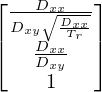

In [74]:
simplify(r[1])

this corresponds to the eigenvalue

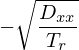

In [75]:
lam[1]

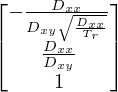

In [76]:
simplify(r[2])

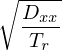

In [77]:
lam[2]

### 2-nd right eigenvector

this corresponds to the eigenvalue

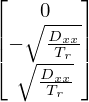

In [78]:
lambd = Matrix (lam)
lambd

# Here they are as a matrix, $R$, in order from smallest to largest eigenvalue

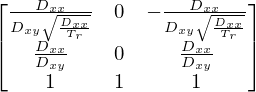

In [79]:
R = zeros(3,3)
R[:,0] = r[1]
R[:,1] = r[0]
R[:,2] = r[2]
simplify(simplify(R))

## Left Eigenvectors

The left eigenvectors satisfy:

$$l A = \lambda l$$

SymPy doesn't have a method to get left eigenvectors directly, so we take the transpose of this expression:

$$(l A)^\intercal = A^\intercal l^\intercal = \lambda l^\intercal$$

Therefore, the transpose of the left eigenvectors, $l^\intercal$, are the right eigenvectors of transpose of $A$

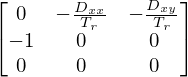

In [80]:
C = H.transpose()
C

In [81]:
L = C.eigenvects()
l = []
laml = []
for (ev, _, ltmp) in L:
    l.append(ltmp[0].transpose())
    laml.append(ev)
    

Traditionally, we normalize these such that $l^{(\mu)} \cdot r^{(\nu)} = \delta_{\mu\nu}$

In [82]:
for n in range(len(l)):
    if lam[n] == laml[n]:
        ltmp = l[n]
        p = ltmp.dot(r[n])
        l[n] = ltmp/p

### 0-th left eigenvector

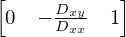

In [83]:
simplify(l[0])

### 1-st left eigenvector

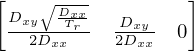

In [84]:
simplify(l[1])

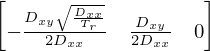

In [85]:
simplify(l[2])

### 2-nd left eigenvector

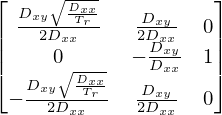

In [86]:
L = zeros(3,3)
L[0,:] = l[1]
L[1,:] = l[0]
L[2,:] = l[2]
simplify(L)

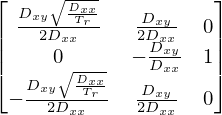

In [87]:
simplify(R**-1)

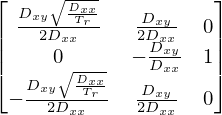

In [88]:
simplify(L)

# The Jacobian Matrix

# Verification of the procedure 

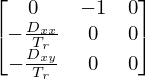

In [89]:
simplify(R*ND*R**-1)

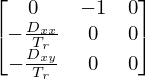

In [90]:
simplify(R*ND*L)

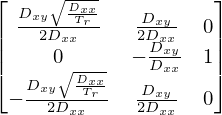

In [91]:
simplify(R**-1)

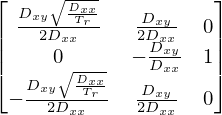

In [92]:
simplify(L)

# The absolute Jacobian is given by

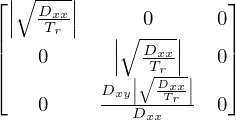

In [93]:
simplify(R*abs(ND)*R**-1)